In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

In [2]:
df19 = pd.read_csv('2019new.csv')
df20 = pd.read_csv('2020new.csv')
df = pd.read_csv('dvf.csv')

In [ ]:
df.tail()

In [ ]:
df19.tail()

In [3]:
def get_year(dt):
    return dt.year 

In [4]:
def get_month(dt):
    return dt.month

In [5]:
def count_rows(rows):
    return len(rows)


In [ ]:
df.dtypes

In [6]:
def transformation(df):
    df['date_mutation']= pd.to_datetime(df['date_mutation'])
    df['month']=df['date_mutation'].map(get_month)

In [7]:
transformation(df)
transformation(df19)
transformation(df20)

df20.head()

,date_mutation,nature_mutation,valeur_fonciere,adresse_nom_voie,nom_commune,code_departement,type_local,surface_terrain,longitude,latitude,month
0,2020-01-02,Vente,247000.0,PL DES MAGNOLIAS,Roissy-en-Brie,77,Dépendance,NaN,2.664408,48.792572,1
1,2020-01-02,Vente,247000.0,PL DES MAGNOLIAS,Roissy-en-Brie,77,Dépendance,NaN,2.664408,48.792572,1
2,2020-01-02,Vente,247000.0,PL DES MAGNOLIAS,Roissy-en-Brie,77,Appartement,NaN,2.664408,48.792572,1
3,2020-01-07,Vente,205000.0,AV LUCIEN BRUNET,Pontault-Combault,77,Appartement,NaN,2.597460,48.777646,1
4,2020-01-07,Vente,205000.0,AV LUCIEN BRUNET,Pontault-Combault,77,Dépendance,NaN,2.597460,48.777646,1


In [26]:
def filtre(df):
    df.loc[df['month'] == 2]
    return (df)

In [31]:
df.groupby('year').apply(count_rows)


year
2019    341298
2020    266087
dtype: int64

In [9]:
a = df['type_local'].value_counts(dropna = False, normalize = True)
print(a)

Appartement                                 0.443320
Dépendance                                  0.291695
Maison                                      0.193758
Local industriel. commercial ou assimilé    0.071227
Name: type_local, dtype: float64


In [11]:
a = df20['type_local'].value_counts(dropna = False, normalize = True)
print(a)

Appartement                                 0.434779
Dépendance                                  0.287707
Maison                                      0.209285
Local industriel. commercial ou assimilé    0.068230
Name: type_local, dtype: float64


                                  --------- visualisation count ------------
                                              type - mois - dep

In [29]:
def map_by(laptime, df):
    return df.groupby(laptime).apply(count_rows)


In [ ]:
#FIG TYPE

def ext1 ():
    df['type_local'].value_counts(dropna = False, normalize = True)
    plt.figure(figsize=(10,10))
    labels = [ 'Maison', 'Appartement', 'Dépendance', 'Local industriel. commercial ou assimilé']
    colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#fffc52']
    area = [44, 29.1, 19.3, 7]
    plt.pie(area, labels=labels, colors= colors, startangle=70, autopct='%1.1f%%')
    plt.title(label= 'Répartition de du type de local vendus en 2019 ')
    plt.legend()
    plt.show()


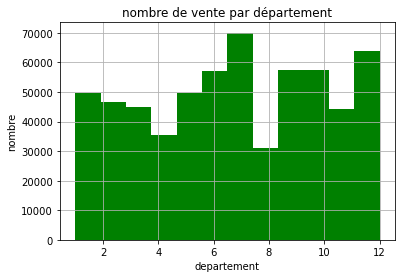

In [27]:
#graphe 2 NON UTILISE
def plot(df):
    plt.grid(True)
    plt.hist(df.month, bins = 12, range = (1, 12), color = 'green' )
    
    plt.xlabel('departement')
    plt.ylabel('nombre')
    plt.title('nombre de vente par département')

plot(df)

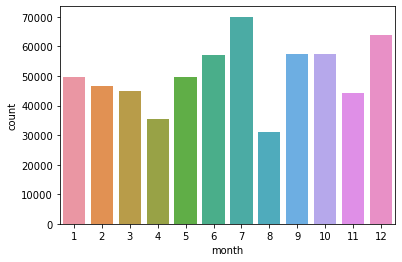

In [26]:
#graphe 3 MONTH
def ext3_monthcount(df):
    sb.countplot(x="month",data=df)

ext3_monthcount(df)

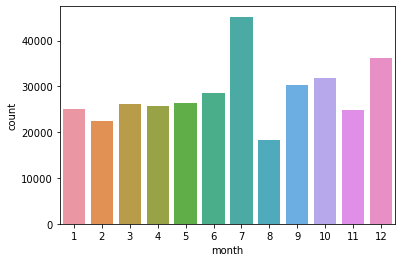

In [27]:
ext3_monthcount(df19)

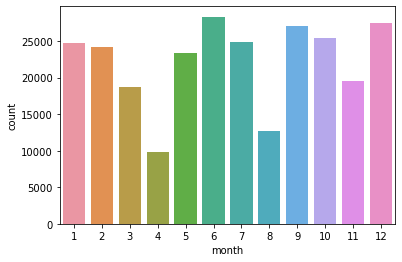

In [28]:
ext3_monthcount(df20)

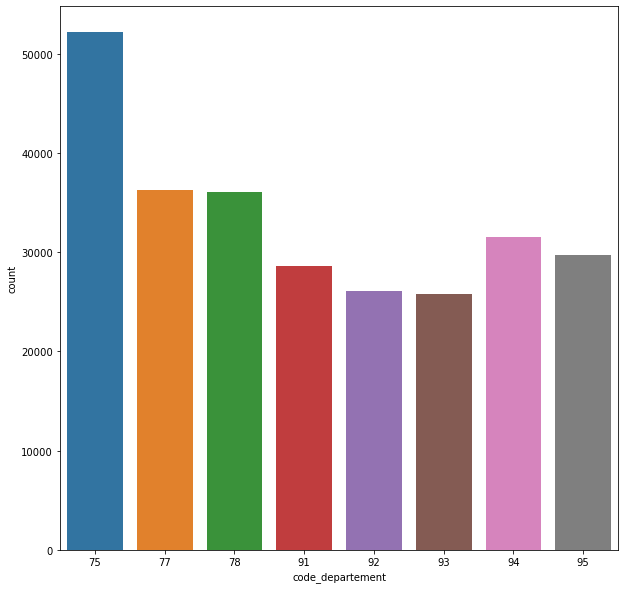

In [39]:
#DEP
def ext4_countdep(df):
    fig = plt.figure(figsize=(10,10))
    sb.countplot(x='code_departement', data=df)
    

ext4_countdep(df20)

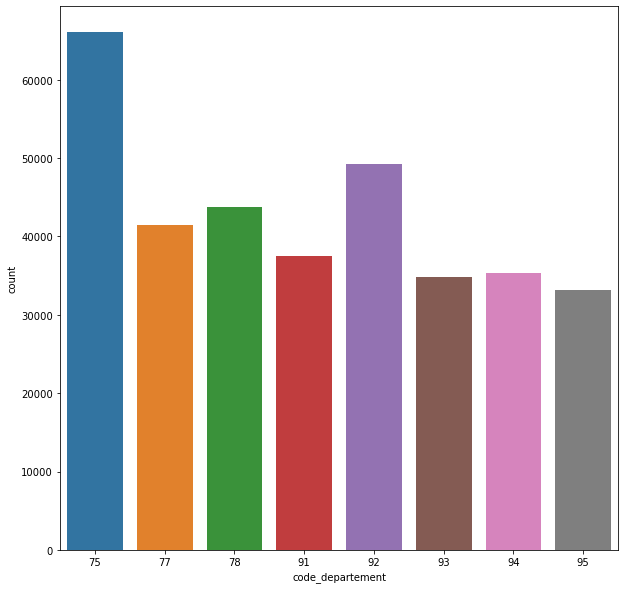

In [40]:
ext4_countdep(df19)

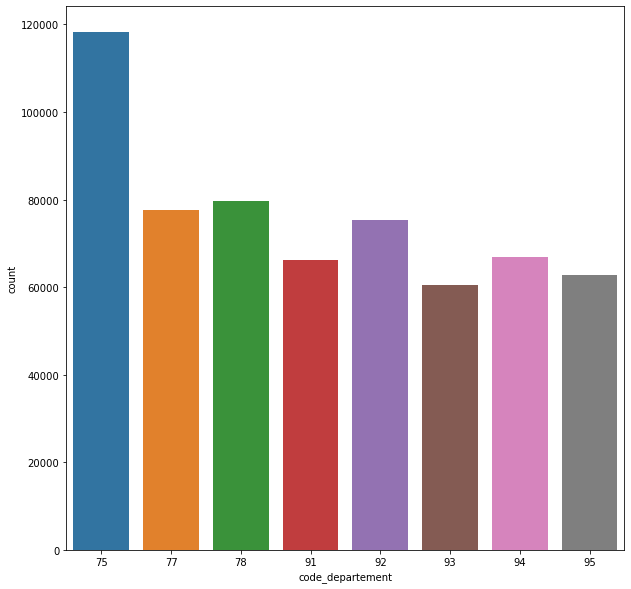

In [41]:
ext4_countdep(df)

                                  --------- visualisation dep ------------
                                  mois - dep  


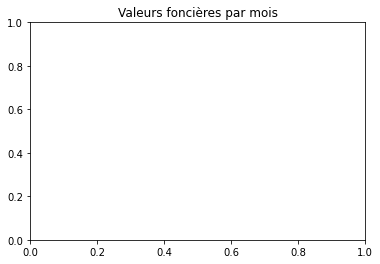

In [60]:
#month
import plotly.express as px


plt.title(label='Valeurs foncières par mois')
nature = df.groupby('month')['valeur_fonciere'].sum()
fig = px.bar(nature,y='valeur_fonciere')
fig.show()

In [ ]:
def map_by(laptime, df):
    return df.groupby(laptime).apply(count_rows)

def create_vizu(df):
    by_date = map_by('year', df)    
    by_date_wk = map_by('month', df)   
    by_date_hr = map_by('code_departement	', df)   
    return pd.DataFrame({'year':by_date , 'month': by_date_wk, 'code_departement': by_date_hr},
    columns = ['year', 'month', 'code_departement'])


<AxesSubplot:xlabel='month', ylabel='valeur_fonciere'>

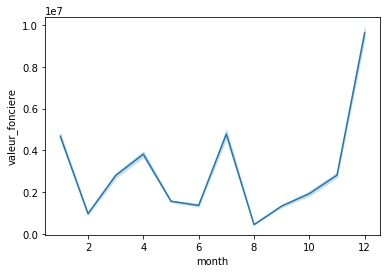

In [19]:
#GRAPHE 4 VAL MOIS
sb.lineplot(x='month',y='valeur_fonciere',data=df, estimator=np.mean)

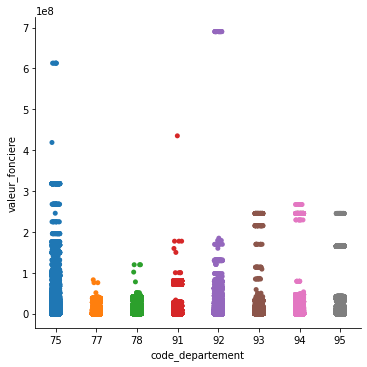

In [59]:
#FIG DEPARTEMENT
sb.catplot(y='valeur_fonciere',x='code_departement', data=df)
